# Assignment 3
Li Liu

Oct 23, 2018

#### 1. Simulation in Sociology, Moretti (2002)

Moretti (2002) analyzes the contributions of four different simulation techniques (sysetm dynamics, multiagent systems, cellular automata, and genetic algorithms) in sociological research. Establishing “validity” of the simulative
model of the theory is crucial, as it measures whether theoretical constructs and their simulated implementation represent the facts of people's behaviors.

The quote by George Box, "All models are wrong, but some are useful.", also applies to the simulations models. These models are "wrong" because of their potential weaknesses in validity. Multiagent systems, for example, provide tools for modeling social interaction and formalizing social roles. However, such models rely heavily on theories of rationality. The recent development of behavior economics have shown people are not necessarily rational in daily decision makings. Also, psychological theories (emotions, motivations, desire, intent, consciousness) are hard to formalize as they vary across individuals and time. Moreover, the complexness of knowledge makes it challenging to be formalized in the models. Missing these pieces would weaken the validity of multiagent systems.

Another example to illustrate validity issue is the cellular automata. One weakness is the use of synchronous updating of states, assuming that all cells are updated according to the global clock. However, in real world, individuals update their opinions and attributes at various moments, as they might have different reactions to the new information. In addition, this model also restricts that individual interacts only with a subset of the population. Such spatial structures are not representative in today's digital age when people can easily interact with each other through the social media.

Simulations models are "useful" when we want to model the dynamic feedback within the social system. One example cited in the paper is the legitimacy-seeking model simulated by Hanneman, Collins, & Mordt (1995). They describe that when there are larger difference between rulers' current legitimacy and the targeted maximum legitimacy, rulers are more motivated to initiate external conflict. If conflict is initiated, the result would alter the prestige in the status order of political communities as well as the current legitimacy. This consequence might initiate new external conflicts.


Dynamic feedback is also useful for understanding topics in political science. One research question to ask is: What's the impact of open immigration policy on democracy? The initial stimulus (countries' democracy levels) changes individuals' immigration choice. In turn, countries with new immigrations tend to be more democractic, and thus attract more global talents. 








Reference:

Moretti, Sabrina, "Computer Simulation in Sociology: What Contribution?" Social

Science Computer Review, 20:1 (Spring 2002), pp. 43-57.

Hanneman, R., Collins, R., & Mordt, G. (1995). Discovering theory dynamics by computer simulation: Experiments
on state legitimacy and imperialist capitalism. Sociological Methodology, 25, 1-46.
    

#### 2. Simulating your income

In [16]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

(a)

In [17]:
def income_sim(p):
    """
    p (Simulation profile) as a dictionary:    
    p = {
        'mu'          :0,          #mean of my income process
        'sigma'       :0.025,      #standard deviation of my income process
        'inc'         :80000,      #starting income
        'gr'          :0.025,      #growth rate
        'rho'         :0.4,        #positive dependence of today’s income on last period’s income
        'st_year'     :int(2018),  #start year
        'lf_years'    :40,         #years to live
        'draws'       :10000       #simulations
    }
    """  
    #set random seed
    np.random.seed(524)
    
    #draw 10,000 sets of 40 normally distributed errors    
    errors = np.random.normal(p['mu'],p['sigma'],(p['lf_years'], p['draws']))

    #create a matrix of dim (lf_years, num_draws)
    ln_income_mat = np.zeros((p['lf_years'], p['draws']))

    #fill the first row of the matrix
    ln_income_mat[0, :] = np.log(p['inc']) + errors[0, :]

    #loop and apply model (fill rows 1 to 39)
    for yr in range(1, p['lf_years']):
        ln_income_mat[yr, :] = (1 - p['rho']) * (np.log(p['inc'])+p['gr']*yr)+\
                                p['rho']*(ln_income_mat[yr - 1, :])+errors[yr, :]
                             

    income_mat = np.exp(ln_income_mat) 
    
    return income_mat

In [18]:
p = {
        'mu'          :0,           #mean of my income process
        'sigma'       :0.13,       #standard deviation of my income process
        'inc'         :80000,      #starting income
        'gr'          :0.025,      #growth rate
        'rho'         :0.4,        #positive dependence of today’s income on last period’s income
        'st_year'     :int(2018),  #start year
        'lf_years'    :40,         #years to live
        'draws'       :10000       #simulations
    }
income=income_sim(p)

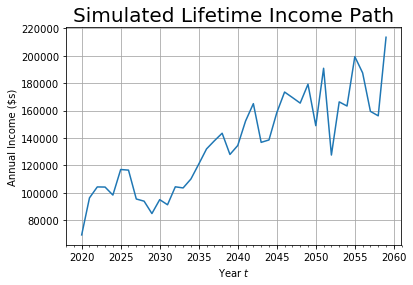

In [19]:
%matplotlib inline
year_vec = np.arange(p['st_year']+2, p['st_year']+2 + p['lf_years'])
individual =5000
fig, ax = plt.subplots()
plt.plot(year_vec, income[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Simulated Lifetime Income Path', fontsize=20)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Income (\$s)')

(b) 

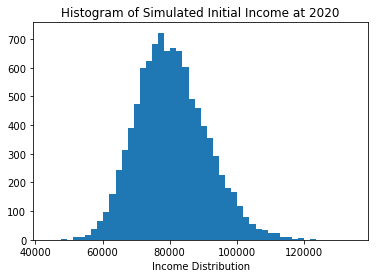

In [20]:
a=income[0,:]
plt.hist(a, bins=50)
plt.xlabel("Income Distribution")
plt.title("Histogram of Simulated Initial Income at 2020")

In [21]:
print("mean:",np.mean(a),"\n","median:",np.median(a))

mean: 80653.27431763953 
 median: 79865.11458578068


For the 10000 simulations of income at year 2020, mean is larger than median. So the distribution is a little bit right-skewed.

In [22]:
(a>100000).sum()/len(a)

0.0417

4.17% of the class will earn more than $100,000 in the first year out of the program.

In [23]:
(a<70000).sum()/len(a)

0.1512

15.12% of the class will earn less than $70,000 in the first year out of the program.


(c)

In [24]:
payoff=income*0.1
t=[]
for i in range(p['draws']):
    paid=payoff[:,i][0]
    for j in range(1,40):
        if paid<95000:
            paid+=payoff[:,i][j]
        else:
            t.append(j)
            break

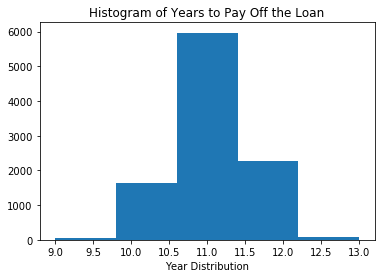

In [25]:
#5 unique years: {9, 10, 11, 12, 13}
plt.hist(t,bins=5)
plt.xlabel("Year Distribution")
plt.title("Histogram of Years to Pay Off the Loan")

In [26]:
len([i for i in t if float(i) <=10])/len(t)

0.1678

16.78% of the individuals in simulations are able to pay off the loan in 10 years!

(d)

In [27]:
p2 = {
        'mu'          :0,           #mean of my income process
        'sigma'       :0.17,       #standard deviation of my income process
        'inc'         :90000,      #starting income
        'gr'          :0.025,      #growth rate
        'rho'         :0.4,        #positive dependence of today’s income on last period’s income
        'st_year'     :int(2018),  #start year
        'lf_years'    :40,         #years to live
        'draws'       :10000       #simulations
    }

In [28]:
income2=income_sim(p2)
payoff2=income2*0.1
t2=[]
for i in range(p2['draws']):
    paid=payoff2[:,i][0]
    for j in range(1,40):
        if paid<95000:
            paid+=payoff2[:,i][j]
        else:
            t2.append(j)
            break
      

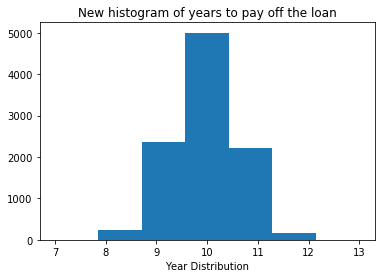

In [29]:
#5 unique years: {7, 8, 9, 10, 11, 12, 13}
plt.hist(t2,bins=7)
plt.xlabel("Year Distribution")
plt.title("New histogram of years to pay off the loan")

In [30]:
len([i for i in t2 if float(i) <=10])/len(t2)

0.7602

76% of the simulations are able to pay off the loan in 10 years if MACSS program becomes very
well known in the next two years!